In [1]:
import pandas
import numpy
import sys
from scipy.stats import chi2
import matplotlib.pyplot as plt
import Regression

numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('precision', 10)
pandas.options.display.float_format = '{:,.7e}'.format

## Question 1

In [2]:
data = pandas.read_csv("claim_history-1.csv")
data = data[["CAR_TYPE", "HOMEKIDS", "KIDSDRIV", "MSTATUS", "REVOKED", "URBANICITY",
             "CAR_AGE", "MVR_PTS", "TIF", "TRAVTIME", "EXPOSURE", "CLM_COUNT"]].copy()
data = data.dropna()
data.head()

,CAR_TYPE,HOMEKIDS,KIDSDRIV,MSTATUS,REVOKED,URBANICITY,CAR_AGE,MVR_PTS,TIF,TRAVTIME,EXPOSURE,CLM_COUNT
0,Minivan,0,0,No,No,Highly Urban/ Urban,1.8000000e+01,3,11,14,1.8900000e-01,0
1,Minivan,0,0,No,No,Highly Urban/ Urban,1.0000000e+00,0,1,22,1.0000000e+00,0
2,Van,0,0,No,No,Highly Urban/ Urban,1.0000000e+01,2,1,26,1.0000000e+00,0
3,SUV,1,0,Yes,No,Highly Urban/ Urban,1.0000000e+01,3,4,5,8.2800000e-01,0
4,Minivan,0,0,Yes,No,Highly Urban/ Urban,6.0000000e+00,0,7,32,7.2900000e-01,0


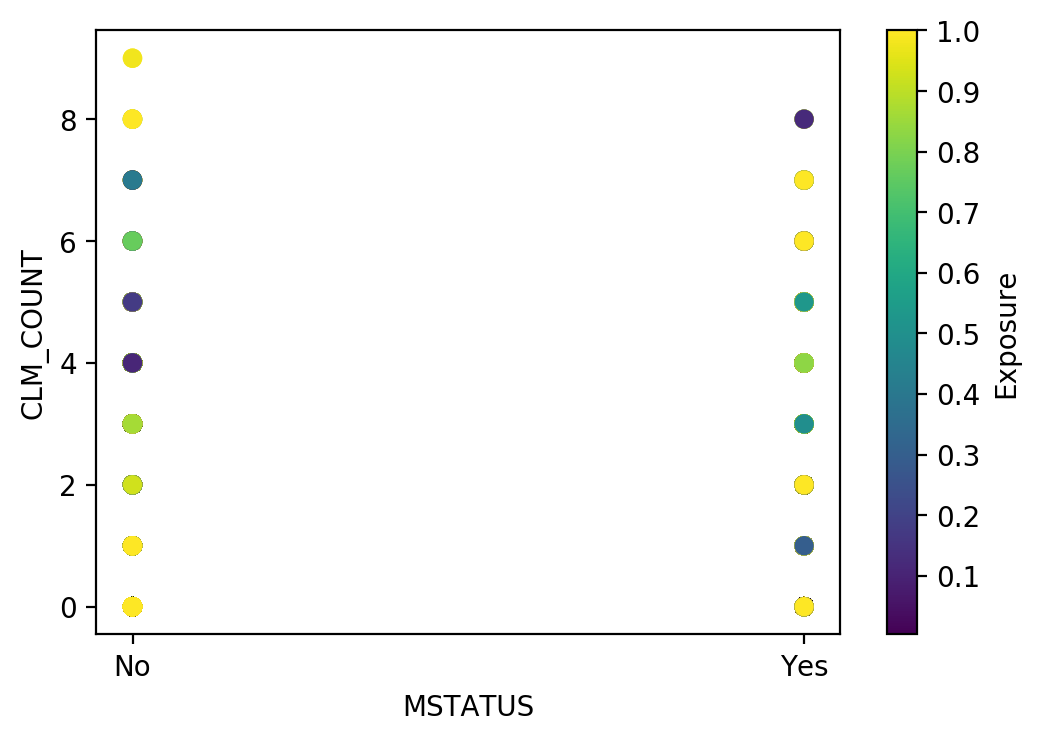

<Figure size 1200x800 with 0 Axes>

In [48]:
data = data.sort_values("MSTATUS", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["MSTATUS"], data["CLM_COUNT"], c=data["EXPOSURE"],marker="o")
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('MSTATUS')
plt.ylabel('CLM_COUNT')
plt.figure(dpi = 200)
plt.show()

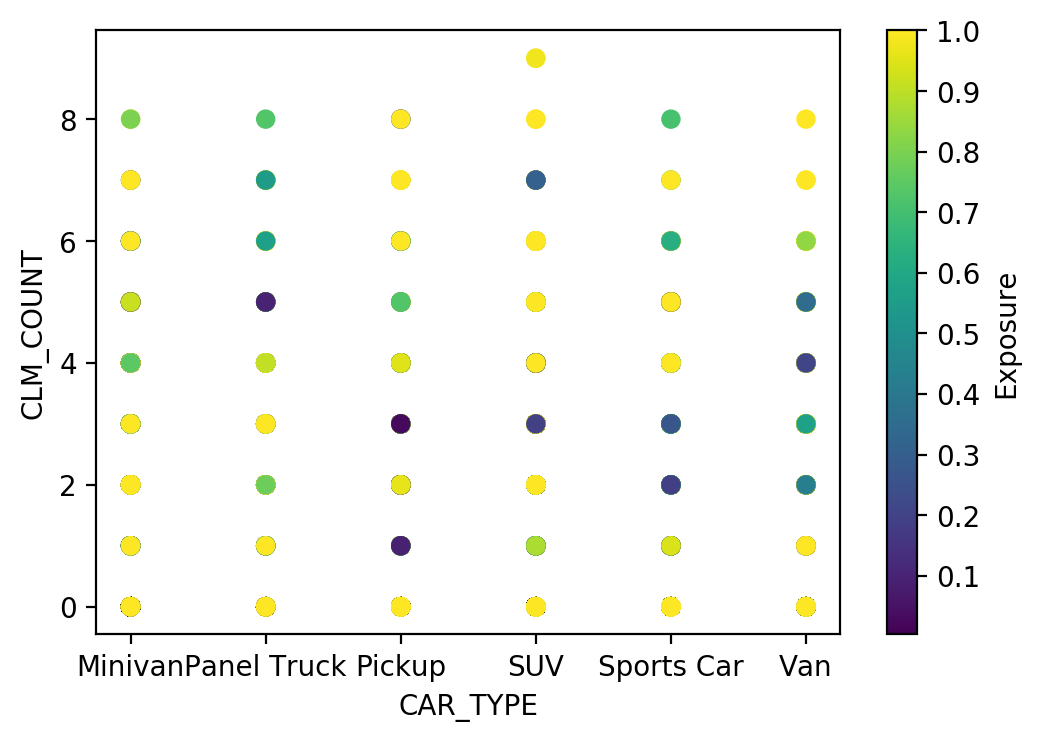

In [49]:
data = data.sort_values("CAR_TYPE", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["CAR_TYPE"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('CAR_TYPE')
plt.ylabel('CLM_COUNT')
plt.show()

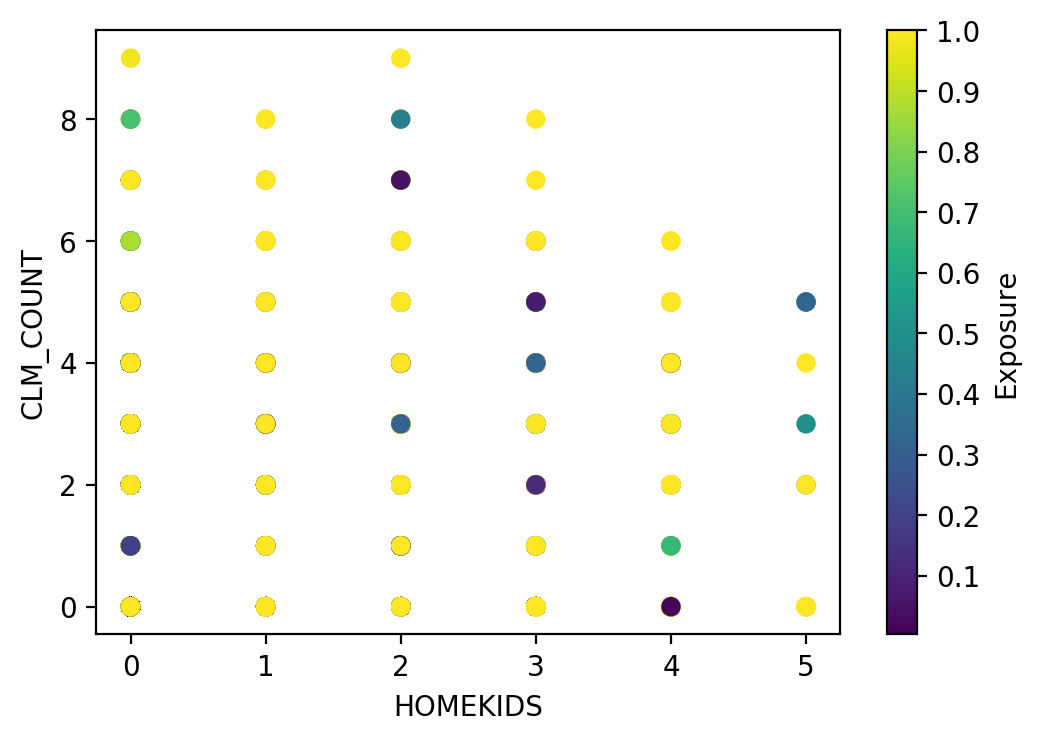

In [51]:
data = data.sort_values("HOMEKIDS", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["HOMEKIDS"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('HOMEKIDS')
plt.ylabel('CLM_COUNT')
plt.show()

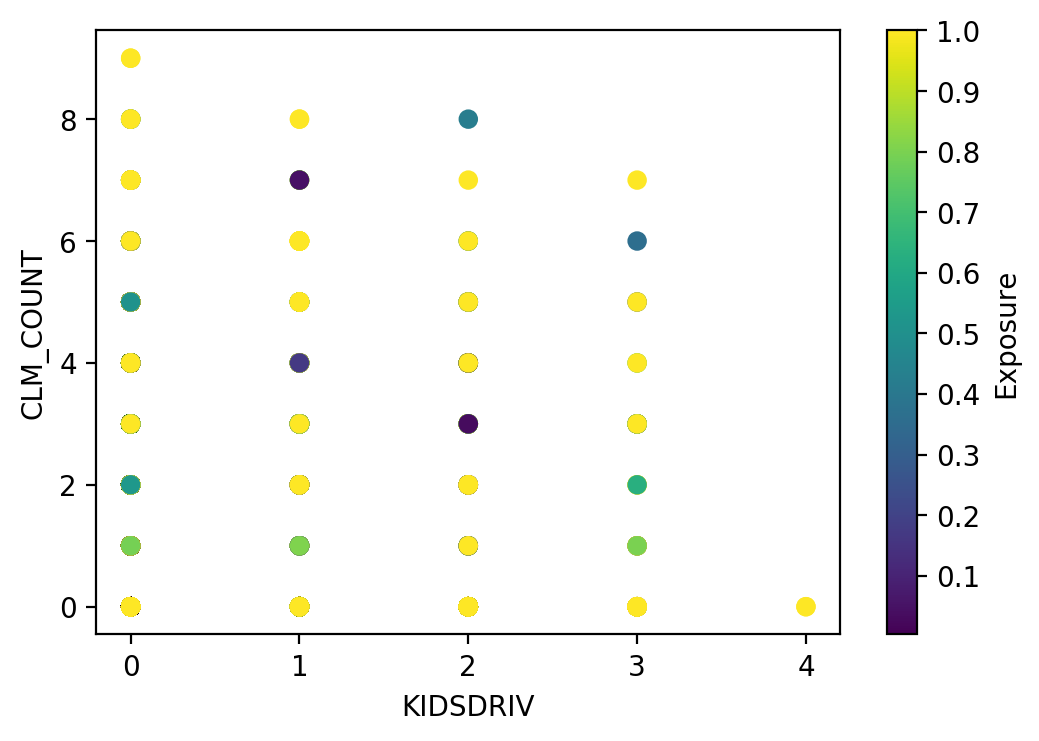

In [53]:
data = data.sort_values("KIDSDRIV", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["KIDSDRIV"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('KIDSDRIV')
plt.ylabel('CLM_COUNT')
plt.show()

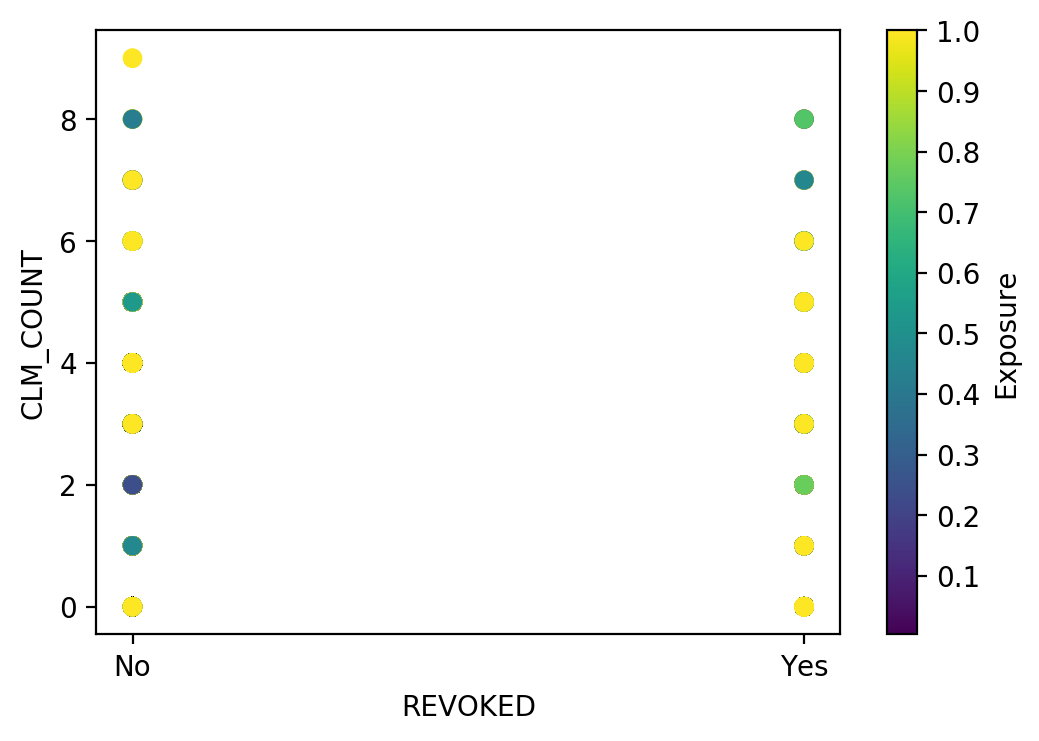

In [55]:
data = data.sort_values("REVOKED", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["REVOKED"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('REVOKED')
plt.ylabel('CLM_COUNT')
plt.show()

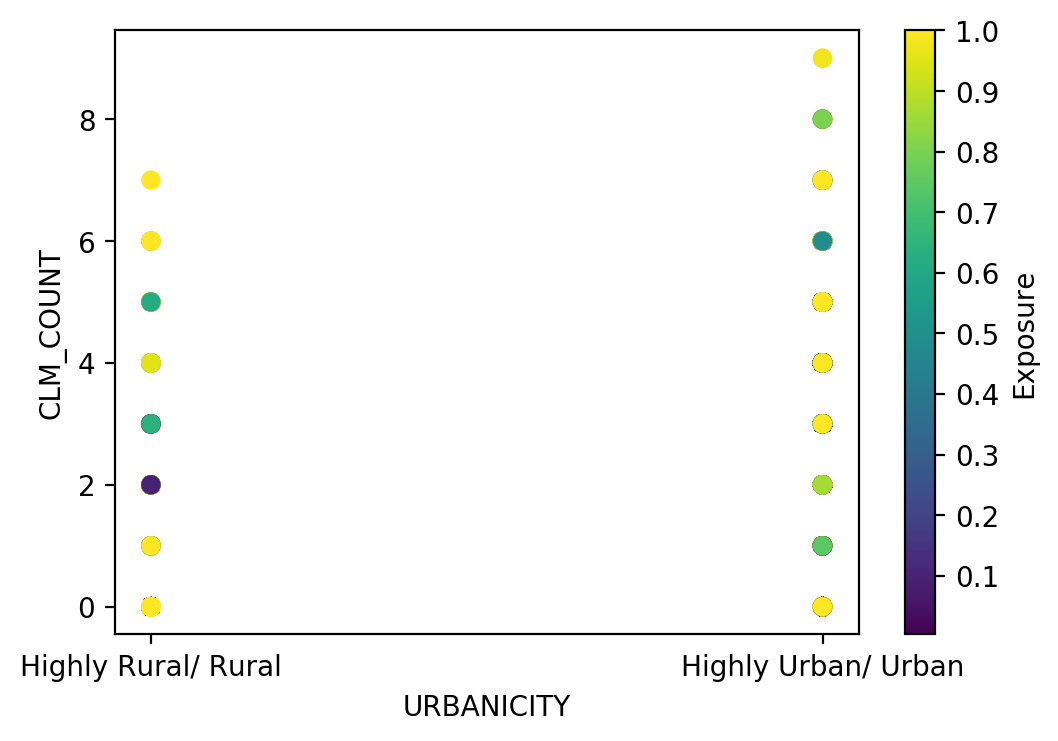

In [56]:
data = data.sort_values("URBANICITY", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["URBANICITY"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('URBANICITY')
plt.ylabel('CLM_COUNT')
plt.show()

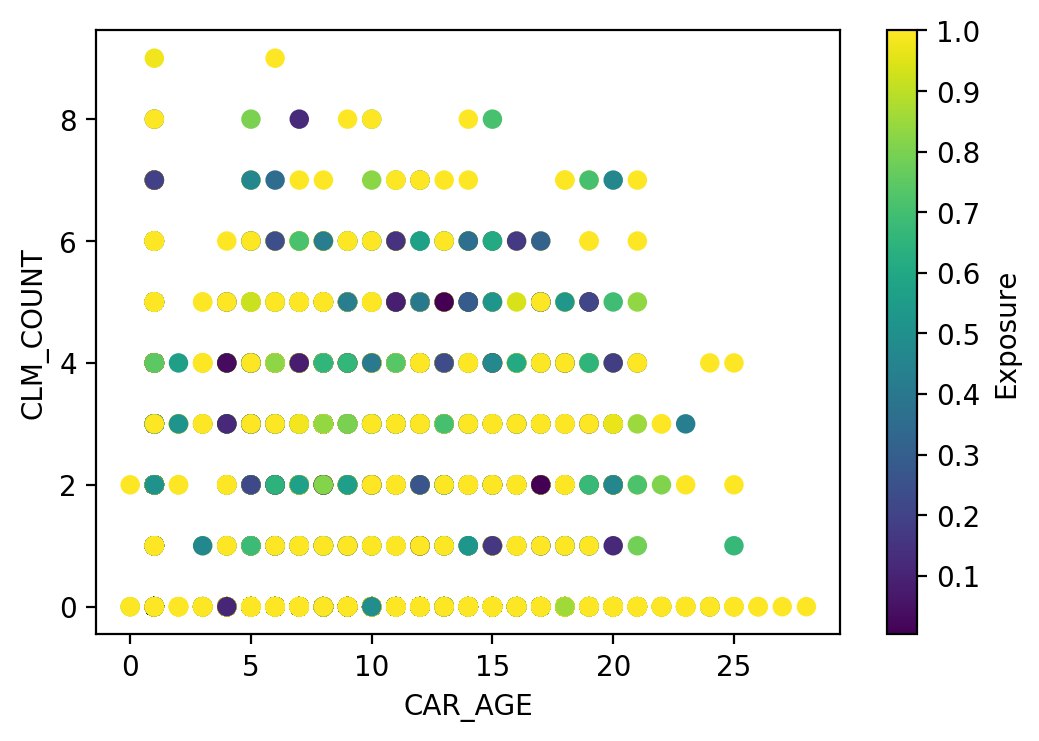

In [57]:
data = data.sort_values("CAR_AGE", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["CAR_AGE"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('CAR_AGE')
plt.ylabel('CLM_COUNT')
plt.show()

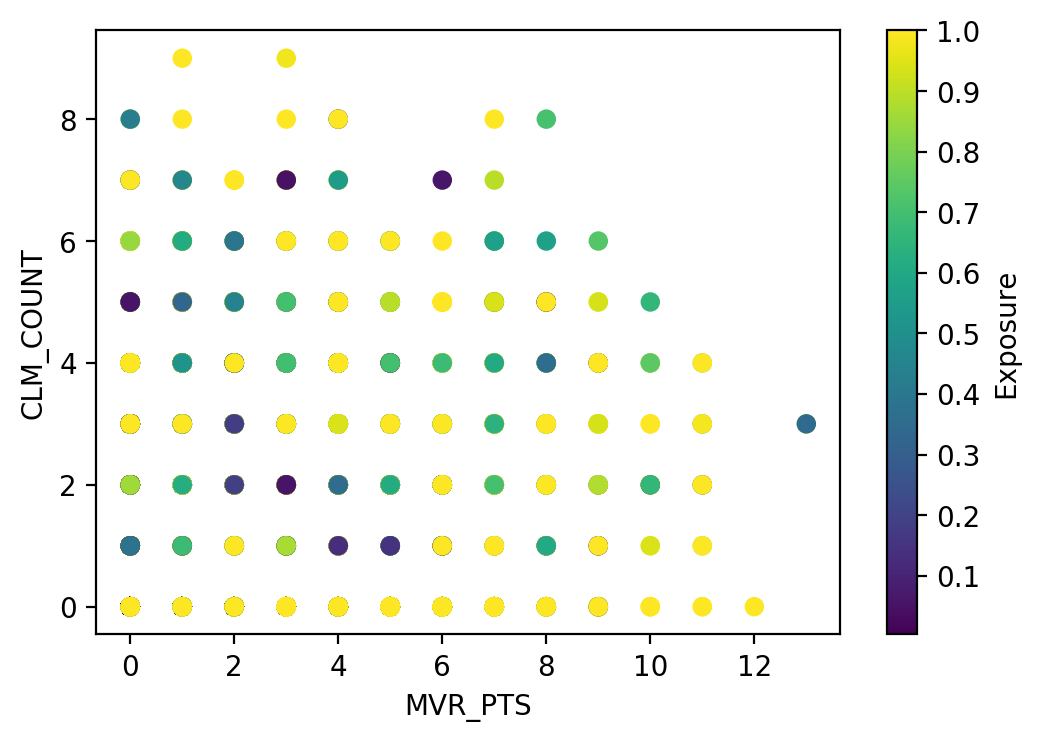

In [58]:
data = data.sort_values("MVR_PTS", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["MVR_PTS"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('MVR_PTS')
plt.ylabel('CLM_COUNT')
plt.show()

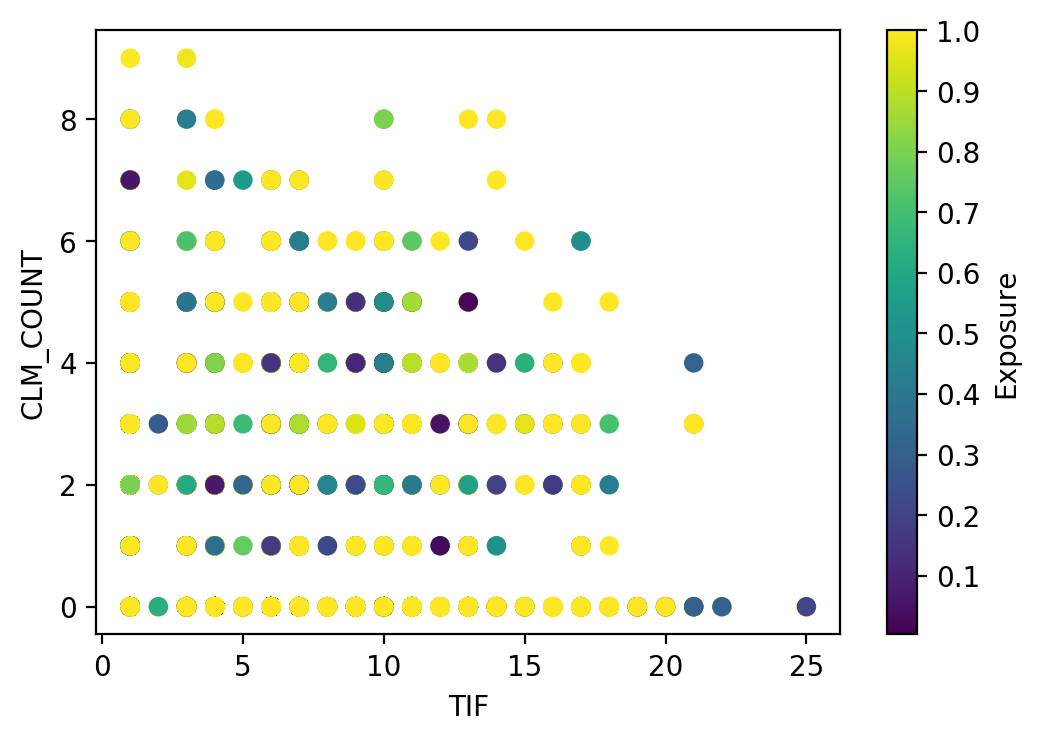

In [59]:
data = data.sort_values("TIF", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["TIF"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('TIF')
plt.ylabel('CLM_COUNT')
plt.show()

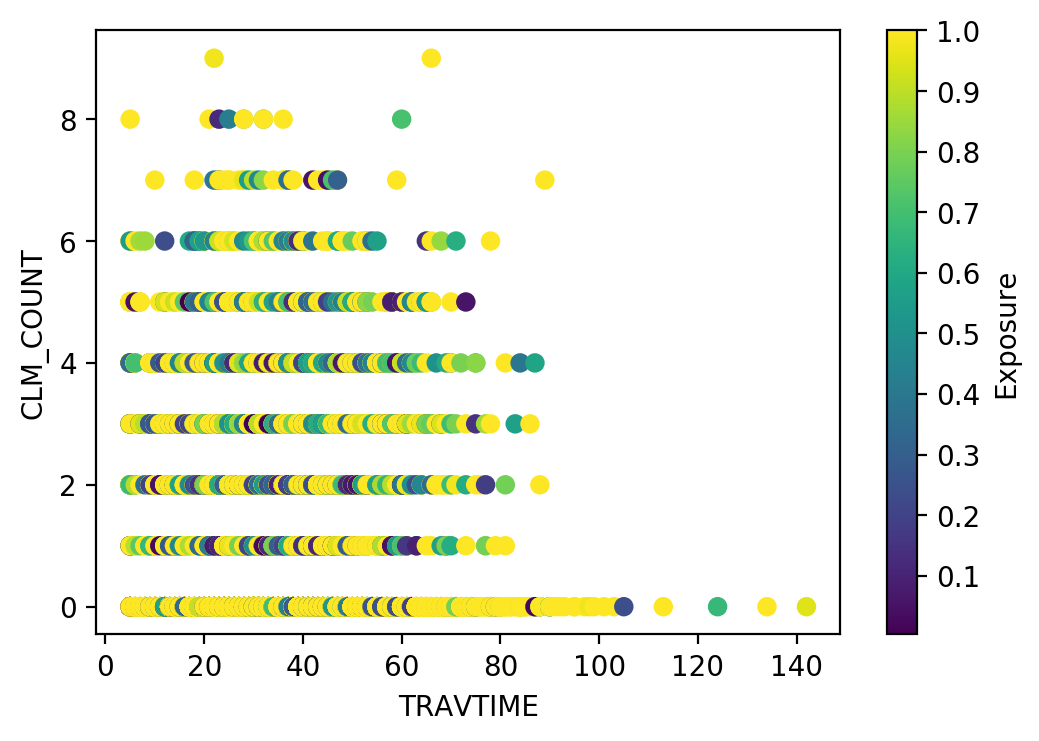

In [60]:
data = data.sort_values("TRAVTIME", ascending=True)
plt.figure(dpi = 200)
p=plt.scatter(data["TRAVTIME"], data["CLM_COUNT"], c=data["EXPOSURE"])
cbar=plt.colorbar(p, label="Exposure")
cbar.set_ticks(numpy.arange(0, 1.1, 0.1))
plt.xlabel('TRAVTIME')
plt.ylabel('CLM_COUNT')
plt.show()

## Question 2

### a

### Find first predictor

In [13]:
u = data['CAR_TYPE'].astype('category')
u_freq = u.value_counts(ascending = True)
pm = u.cat.reorder_categories(list(u_freq.index))
term_car_type = pandas.get_dummies(pm)

u = data['MSTATUS'].astype('category')
u_freq = u.value_counts(ascending = True)
pm = u.cat.reorder_categories(list(u_freq.index))
term_mstatus = pandas.get_dummies(pm)
term_mstatus.columns = ["MSTATUS_NO", "MSTATUS_YES"]

u = data['URBANICITY'].astype('category')
u_freq = u.value_counts(ascending = True)
pm = u.cat.reorder_categories(list(u_freq.index))
term_urbancity = pandas.get_dummies(pm)

u = data['REVOKED'].astype('category')
u_freq = u.value_counts(ascending = True)
pm = u.cat.reorder_categories(list(u_freq.index))
term_revoked = pandas.get_dummies(pm)
term_revoked.columns = ["REVOKED_NO", "REVOKED_YES"]

term_homekids = data[['HOMEKIDS']]
term_kidsdriv = data[['KIDSDRIV']]

term_car_age = data[['CAR_AGE']]
term_mvr_pts = data[['MVR_PTS']]

term_tif = data[['TIF']]
term_travtime = data[['TRAVTIME']]


y_train = data['CLM_COUNT']
o_train = numpy.log(data['EXPOSURE'])

# Intercept only model
X_train = data[['CLM_COUNT']].copy()
X_train.insert(0, 'Intercept', 1.0)
X_train.drop(columns = ['CLM_COUNT'], inplace = True)

step_summary = pandas.DataFrame()

outList = Regression.PoissonModel(X_train, y_train, o_train)
llk_0 = outList[3]
df_0 = len(outList[4])
step_summary = step_summary.append([['Intercept', df_0, llk_0, numpy.nan, numpy.nan, numpy.nan]], ignore_index = True)
step_summary

# Find the first predictor
step_detail = pandas.DataFrame()

predictors = ["CAR_TYPE", "HOMEKIDS", "KIDSDRIV", "MSTATUS", "REVOKED", "URBANICITY",
             "CAR_AGE", "MVR_PTS", "TIF", "TRAVTIME"]
terms = [term_car_type, term_homekids, term_kidsdriv, term_mstatus, term_revoked, term_urbancity, term_car_age, term_mvr_pts, 
        term_tif, term_travtime]

for i in range(len(predictors)):
    # Try Intercept + CAR_TYPE
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ ' + predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ CAR_TYPE,6,-1.7117143e+04,4.1454849e+02,5,2.1690060e-87
1,+ HOMEKIDS,2,-1.7168230e+04,3.1237428e+02,1,6.6375895e-70
2,+ KIDSDRIV,2,-1.7209684e+04,2.2946760e+02,1,7.7884619e-52
3,+ MSTATUS,2,-1.7138676e+04,3.7148307e+02,1,8.8978669e-83
4,+ REVOKED,2,-1.7087785e+04,4.7326491e+02,1,6.2417433e-105
5,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1,0.0000000e+00
6,+ CAR_AGE,2,-1.7170782e+04,3.0727097e+02,1,8.5848521e-69
7,+ MVR_PTS,2,-1.6816770e+04,1.0152957e+03,1,8.5025203e-223
8,+ TIF,2,-1.7249465e+04,1.4990488e+02,1,1.8186579e-34
9,+ TRAVTIME,2,-1.7285968e+04,7.6900009e+01,1,1.7983635e-18


In [14]:
# Current model is Intercept + MVR_PTS
row = step_detail[step_detail[0] == '+ MVR_PTS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_mvr_pts)

### Find the second predictor

In [15]:
step_detail = pandas.DataFrame()

predictors = ["CAR_TYPE", "HOMEKIDS", "KIDSDRIV", "MSTATUS", "REVOKED", "URBANICITY",
             "CAR_AGE",  "TIF", "TRAVTIME"]
terms = [term_car_type, term_homekids, term_kidsdriv, term_mstatus, term_revoked, term_urbancity, term_car_age,
        term_tif, term_travtime]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + ' + predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + CAR_TYPE,7,-1.6645994e+04,3.4155202e+02,5,1.1527469e-71
1,+ MVR_PTS + HOMEKIDS,3,-1.6702978e+04,2.2758325e+02,1,2.0063523e-51
2,+ MVR_PTS + KIDSDRIV,3,-1.6727163e+04,1.7921316e+02,1,7.1981547e-41
3,+ MVR_PTS + MSTATUS,3,-1.6665458e+04,3.0262360e+02,1,8.8345900e-68
4,+ MVR_PTS + REVOKED,3,-1.6618268e+04,3.9700323e+02,1,2.4734370e-88
5,+ MVR_PTS + URBANICITY,3,-1.6132234e+04,1.3690720e+03,1,1.1046068e-299
6,+ MVR_PTS + CAR_AGE,3,-1.6684915e+04,2.6371010e+02,1,2.6657785e-59
7,+ MVR_PTS + TIF,3,-1.6752050e+04,1.2943963e+02,1,5.4344344e-30
8,+ MVR_PTS + TRAVTIME,3,-1.6781871e+04,6.9796707e+01,1,6.5742541e-17


In [16]:
# Current model is Intercept + MVR_PTS + URBANICITY
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_urbancity)

### Find the third predictor

In [17]:
step_detail = pandas.DataFrame()

predictors = ["CAR_TYPE", "HOMEKIDS", "KIDSDRIV", "MSTATUS", "REVOKED", 
             "CAR_AGE",  "TIF", "TRAVTIME"]
terms = [term_car_type, term_homekids, term_kidsdriv, term_mstatus, term_revoked,  term_car_age,
        term_tif, term_travtime]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + ' + predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_TYPE,8,-1.5932299e+04,3.9987010e+02,5,3.1641902e-84
1,+ MVR_PTS + URBANICITY + HOMEKIDS,4,-1.5982629e+04,2.9921031e+02,1,4.8957574e-67
2,+ MVR_PTS + URBANICITY + KIDSDRIV,4,-1.6021390e+04,2.2168679e+02,1,3.8766688e-50
3,+ MVR_PTS + URBANICITY + MSTATUS,4,-1.5975215e+04,3.1403717e+02,1,2.8825236e-70
4,+ MVR_PTS + URBANICITY + REVOKED,4,-1.5975839e+04,3.1278936e+02,1,5.3900256e-70
5,+ MVR_PTS + URBANICITY + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1,6.9691259e-104
6,+ MVR_PTS + URBANICITY + TIF,4,-1.6062675e+04,1.3911847e+02,1,4.1494372e-32
7,+ MVR_PTS + URBANICITY + TRAVTIME,4,-1.6034452e+04,1.9556367e+02,1,1.9408438e-44


In [18]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_car_age)

### Find the fourth predictor

In [19]:
step_detail = pandas.DataFrame()

predictors = ["CAR_TYPE", "HOMEKIDS", "KIDSDRIV", "MSTATUS", "REVOKED", 
             "TIF", "TRAVTIME"]
terms = [term_car_type, term_homekids, term_kidsdriv, term_mstatus, term_revoked, 
        term_tif, term_travtime]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + CAR_AGE + ' + predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_AGE + CAR_TYPE,9,-1.5722310e+04,3.5139907e+02,5,8.7474772e-74
1,+ MVR_PTS + URBANICITY + CAR_AGE + HOMEKIDS,5,-1.5800190e+04,1.9563899e+02,1,1.8687564e-44
2,+ MVR_PTS + URBANICITY + CAR_AGE + KIDSDRIV,5,-1.5800253e+04,1.9551138e+02,1,1.9925214e-44
3,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1,2.1869339e-79
4,+ MVR_PTS + URBANICITY + CAR_AGE + REVOKED,5,-1.5752249e+04,2.9152012e+02,1,2.3192087e-65
5,+ MVR_PTS + URBANICITY + CAR_AGE + TIF,5,-1.5831659e+04,1.3269945e+02,1,1.0518942e-30
6,+ MVR_PTS + URBANICITY + CAR_AGE + TRAVTIME,5,-1.5799473e+04,1.9707190e+02,1,9.0956166e-45


In [20]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_mstatus)

### Find the fifth predictor

In [21]:
step_detail = pandas.DataFrame()

predictors = ["CAR_TYPE", "HOMEKIDS", "KIDSDRIV",  "REVOKED", 
             "TIF", "TRAVTIME"]
terms = [term_car_type, term_homekids, term_kidsdriv, term_revoked, 
        term_tif, term_travtime]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + ' + predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5,5.0584841e-76
1,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + HOMEKIDS,6,-1.5603268e+04,2.3357106e+02,1,9.9215317e-53
2,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + KIDSDRIV,6,-1.5608020e+04,2.2406729e+02,1,1.1728448e-50
3,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + REVOKED,6,-1.5581687e+04,2.7673236e+02,1,3.8697696e-62
4,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + TIF,6,-1.5650360e+04,1.3938719e+02,1,3.6242851e-32
5,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + TRAVTIME,6,-1.5619911e+04,2.0028380e+02,1,1.8109281e-45


In [22]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_car_type)

### Find the sixth predictor

In [23]:
step_detail = pandas.DataFrame()

predictors = ["HOMEKIDS", "KIDSDRIV",  "REVOKED", 
             "TIF", "TRAVTIME"]
terms = [term_homekids, term_kidsdriv, term_revoked, 
        term_tif, term_travtime]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + ' + predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + HOMEKIDS,11,-1.5427671e+04,2.2297366e+02,1,2.0312906e-50
1,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + KIDSDRIV,11,-1.5423807e+04,2.3070133e+02,1,4.1917451e-52
2,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1,4.1423638e-61
3,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + TIF,11,-1.5467611e+04,1.4309284e+02,1,5.6096135e-33
4,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + TRAVTIME,11,-1.5437587e+04,2.0314091e+02,1,4.3096304e-46


In [24]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_revoked)

### Find the seventh predictor

In [25]:
step_detail = pandas.DataFrame()

predictors = ["HOMEKIDS", "KIDSDRIV", 
             "TIF", "TRAVTIME"]
terms = [term_homekids, term_kidsdriv, 
        term_tif, term_travtime]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + ' + 
                                       predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + HOMEKIDS,12,-1.5302473e+04,2.0136027e+02,1,1.0543743e-45
1,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1,3.3934421e-47
2,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + TIF,12,-1.5339027e+04,1.2825350e+02,1,9.8784436e-30
3,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + TRAVTIME,12,-1.5305349e+04,1.9560842e+02,1,1.8976928e-44


In [26]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_kidsdriv)

### Find the eighth predictor

In [27]:
step_detail = pandas.DataFrame()

predictors = ["HOMEKIDS", 
             "TIF", "TRAVTIME"]
terms = [term_homekids, 
        term_tif, term_travtime]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + ' + 
                                       predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + HOMEKIDS,13,-1.5261996e+04,7.4114833e+01,1,7.3702435e-18
1,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TIF,13,-1.5238763e+04,1.2058167e+02,1,4.7183874e-28
2,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1,4.2649355e-44


In [28]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_travtime)

### Find the ninth predictor

In [29]:
step_detail = pandas.DataFrame()

predictors = ["HOMEKIDS", "TIF"]
terms = [term_homekids, 
        term_tif]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + ' + 
                                       predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + HOMEKIDS,14,-1.5160473e+04,8.3163802e+01,1,7.5528183e-20
1,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF,14,-1.5145287e+04,1.1353589e+02,1,1.6467361e-26


In [30]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_tif)

In [31]:
step_detail = pandas.DataFrame()

predictors = ["HOMEKIDS"]
terms = [term_homekids]

for i in range(len(predictors)):
    X = X_train.join(terms[i])
    outList = Regression.PoissonModel(X, y_train, o_train)
    llk_1 = outList[3]
    df_1 = len(outList[4])
    deviance_chisq = 2 * (llk_1 - llk_0)
    deviance_df = df_1 - df_0
    deviance_sig = chi2.sf(deviance_chisq, deviance_df)
    step_detail = step_detail.append([['+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + ' + 
                                       predictors[i], df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS,15,-1.5102010e+04,8.6553304e+01,1,1.3602126e-20


In [32]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS
row = step_detail[step_detail[0] == '+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_homekids)

In [33]:
step_summary.insert(0, "step", range(0, 11))

In [34]:
step_summary.columns  = ["step", "predictors", "num of non aliased parameter",
                        "log-likelihood", "Deviance Chi-Squares", "Deviance Df", "Chi-square significance"]
step_summary

,step,predictors,num of non aliased parameter,log-likelihood,Deviance Chi-Squares,Deviance Df,Chi-square significance
0,0,Intercept,1,-1.7324418e+04,nan,nan,nan
1,1,+ MVR_PTS,2,-1.6816770e+04,1.0152957e+03,1.0000000e+00,8.5025203e-223
2,2,+ MVR_PTS + URBANICITY,3,-1.6132234e+04,1.3690720e+03,1.0000000e+00,1.1046068e-299
3,3,+ MVR_PTS + URBANICITY + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,4,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
5,5,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76
6,6,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1.0000000e+00,4.1423638e-61
7,7,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1.0000000e+00,3.3934421e-47
8,8,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1.0000000e+00,4.2649355e-44
9,9,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF,14,-1.5145287e+04,1.1353589e+02,1.0000000e+00,1.6467361e-26


### b)

The final model contains the following pridictors:  MVR_PTS , URBANICITY , CAR_AGE , MSTATUS , CAR_TYPE, REVOKED , KIDSDRIV , TRAVTIME , TIF ,
    HOMEKIDS

### c)

In [35]:
X_train.columns[outList[4]]

Index(['Intercept', 'MVR_PTS', 'Highly Rural/ Rural', 'CAR_AGE', 'MSTATUS_NO',
       'Panel Truck', 'Van', 'Sports Car', 'Pickup', 'Minivan', 'REVOKED_NO',
       'KIDSDRIV', 'TRAVTIME', 'TIF', 'HOMEKIDS'],
      dtype='object')

aliased parameters: Urbanicity,Mstatus,CAR_TYPE, REVOKED
aliased categories are: Highly Urban/ Urban, MSTATUS_YES, SUV, REVOKED_YES

### d)

There are 15 non-aliased parameters in the final model.

### e)

In [36]:
outList[0]

,Estimate,Standard Error,Lower 95% CI,Upper 95% CI,Exponentiated
Intercept,-2.6322414e-01,4.4018393e-02,-3.4949860e-01,-1.7694967e-01,7.6856961e-01
MVR_PTS,8.7009883e-02,4.4357124e-03,7.8316047e-02,9.5703720e-02,1.0909075e+00
Highly Rural/ Rural,-1.7758313e+00,5.4677121e-02,-1.8829965e+00,-1.6686661e+00,1.6934262e-01
Highly Urban/ Urban,0.0000000e+00,0.0000000e+00,0.0000000e+00,0.0000000e+00,1.0000000e+00
CAR_AGE,-3.9573491e-02,2.1044246e-03,-4.3698088e-02,-3.5448895e-02,9.6119931e-01
MSTATUS_NO,4.5935083e-01,2.2857571e-02,4.1455082e-01,5.0415085e-01,1.5830460e+00
MSTATUS_YES,0.0000000e+00,0.0000000e+00,0.0000000e+00,0.0000000e+00,1.0000000e+00
Panel Truck,3.9330010e-02,4.4299910e-02,-4.7496218e-02,1.2615624e-01,1.0401137e+00
Van,-1.8766485e-02,4.3011406e-02,-1.0306729e-01,6.5534321e-02,9.8140851e-01
Sports Car,1.7762272e-01,3.6036263e-02,1.0699295e-01,2.4825250e-01,1.1943746e+00


## Question 3

### a)

In [61]:
preds = outList[6]

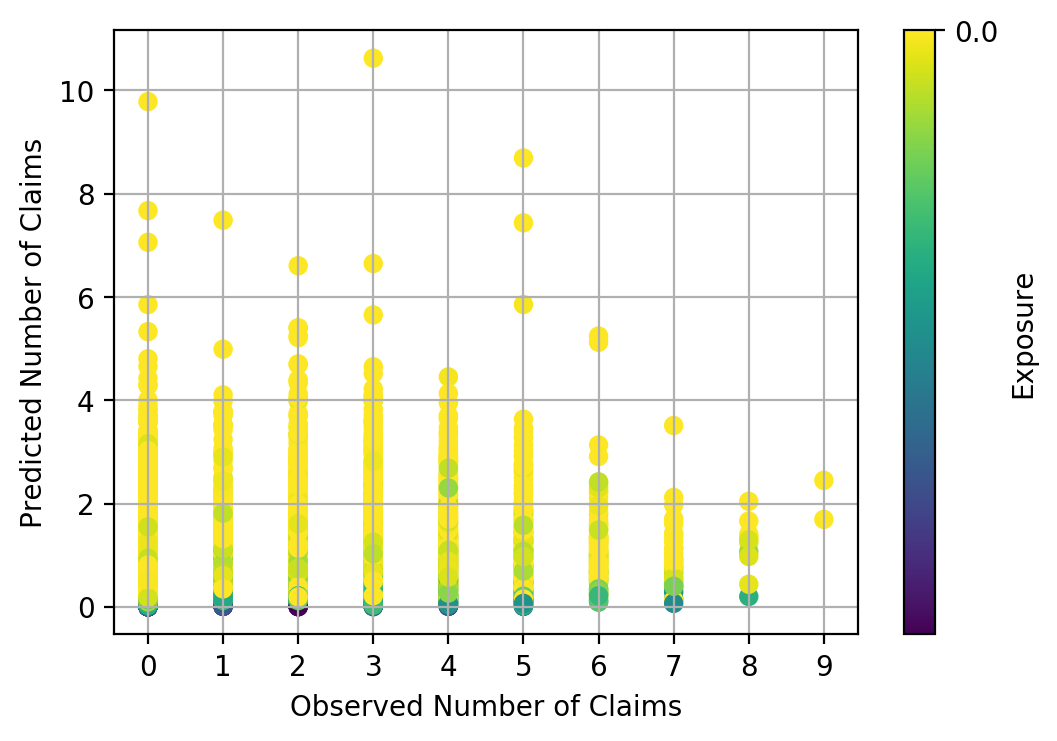

In [41]:
import numpy as np
plt.figure(dpi = 200)
sg = plt.scatter(y_train, preds, c = o_train, marker = 'o')
plt.xlabel('Observed Number of Claims')
plt.ylabel('Predicted Number of Claims')
plt.xticks(range(10))
plt.grid(axis = 'both')
cbar = plt.colorbar(sg, label = 'Exposure')
cbar.set_ticks(np.arange(0.0, 1.1, 0.1))
plt.show()

### b)

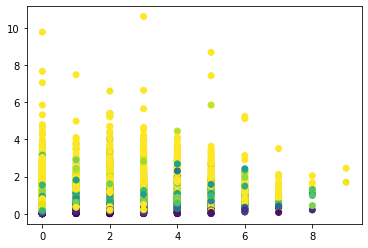

In [38]:
resids = data["CLM_COUNT"]- preds
plt.scatter(data["CLM_COUNT"], preds, c=data["EXPOSURE"])

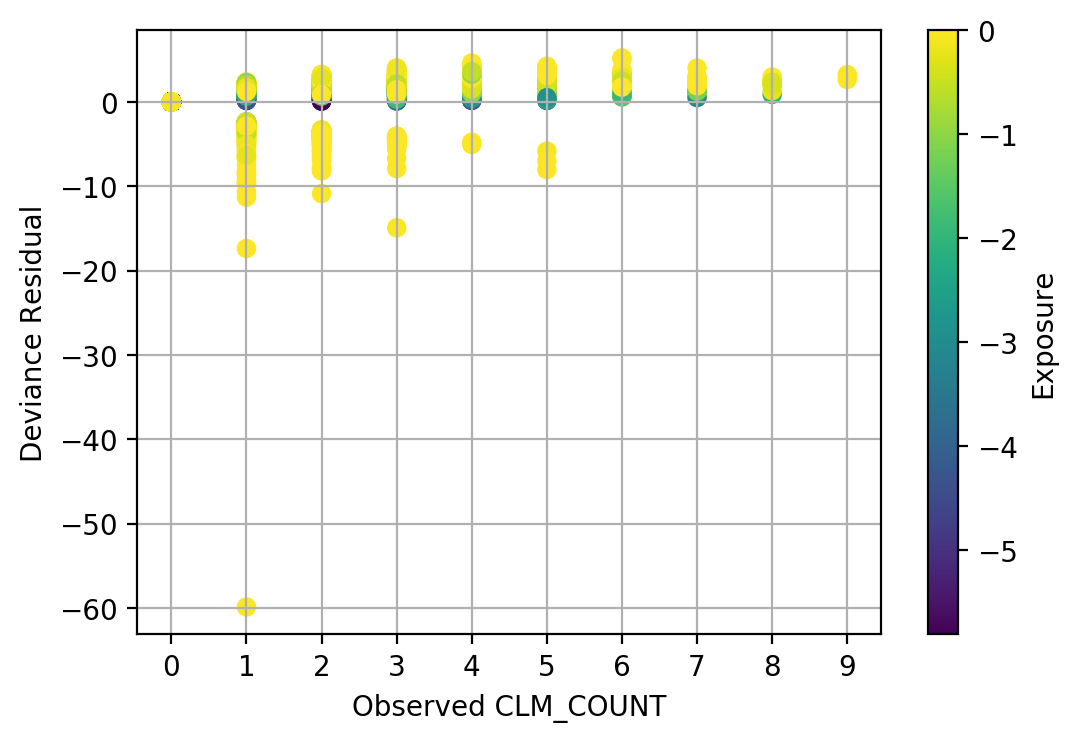

In [42]:
dR2=y_train*np.exp(preds/y_train)-(y_train-preds)
devResid = np.where(y_train > preds, 1.0, -1.0) * np.where(dR2 > 0.0, np.sqrt(2.0 * dR2), 0.0)

plt.figure(dpi = 200)
sg = plt.scatter(y_train, devResid, c = o_train, marker = 'o')
plt.xlabel('Observed CLM_COUNT')
plt.ylabel('Deviance Residual')
plt.xticks(range(10))
plt.grid(axis = 'both')
plt.colorbar(sg, label = 'Exposure')
plt.show()

## Question 4

### a)

In [39]:
# Root Mean Squared Error
y_resid = y_train - preds
mse = numpy.sum(numpy.power(y_resid, 2)) / len(preds)
rmse = numpy.sqrt(mse)
print('Root Mean Squared Error = ', rmse)
# Relative Error
relerr = mse / numpy.var(y_train, ddof = 0)
print('Relative Error = ', relerr)
sqcor = numpy.power(numpy.corrcoef(y_train, preds), 2)
print('Squared Correlation = ', sqcor[0,1])

Root Mean Squared Error =  1.516457528529213
Relative Error =  0.9947252006025616
Squared Correlation =  0.05899548511957742


### b)

The RMSE is 1.52.It is larger than 1. The relative error is 0.99. It is very high. The r-squared is very small. The model performs badly on the prediction.
